In [25]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from models.ETD_KT_CM_JAX_Vectorised import ETD_KT_CM_JAX_Vectorised, ic
from models.ETD_KT_CM_JAX_Vectorised import KDV_params, KS_params, Heat_params, Burgers_params
from ml_collections import ConfigDict

In [2]:
params = ConfigDict(KDV_params)
params.update(E=10)

print(params)

E: 10
P: 1
c_0: 0
c_1: 1
c_2: 0.0
c_3: 0.01
c_4: 0.0
dt: 0.0078125
nx: 256
sigma: 0.01
tmax: 64



In [14]:
fwd_model = ETD_KT_CM_JAX_Vectorised(params)
nt = int(params.tmax/params.dt)

In [15]:
initial = ic(fwd_model.x, params.E)

In [16]:
u_final, u_all = fwd_model.run(initial, nt, None)
print(u_final.shape)
print(u_final[0,56])

(10, 256)
0.7131263044532234


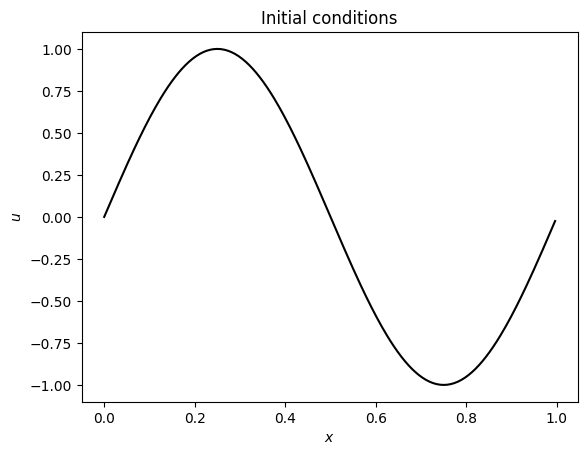

In [30]:
plt.title(f'Initial conditions')
plt.plot(fwd_model.x, initial[0,:].squeeze(), color = 'black')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.show()

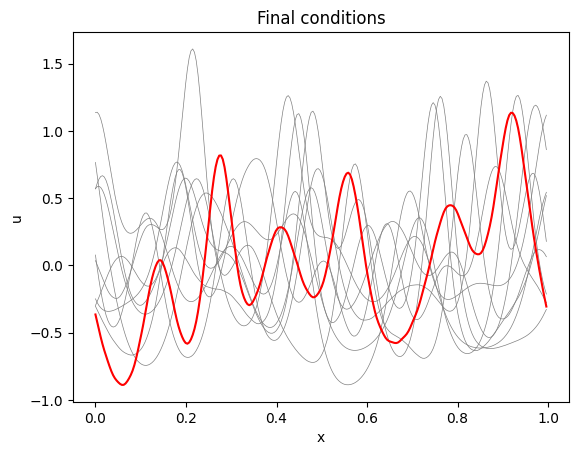

In [31]:
plt.title(f'Final conditions')
plt.plot(fwd_model.x, u_final[:, :].T, color='grey', linewidth=0.5)
plt.plot(fwd_model.x, u_final[0,:].squeeze(), color = 'red')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

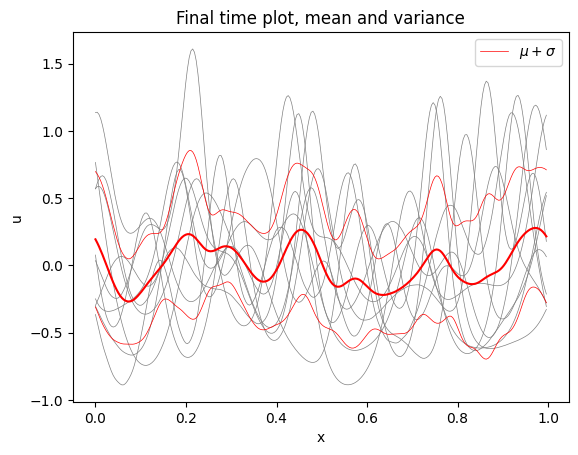

In [32]:
plt.title(f'Final time plot, mean and variance')
plt.plot(fwd_model.x, u_final[:,:].T, color='grey', linewidth=0.5)
plt.plot(fwd_model.x, u_final.mean(axis=0), color = 'red')
plt.plot(fwd_model.x, u_final.mean(axis=0)+u_final.std(axis=0), linewidth=0.5, color = 'red',label=f'$\mu + \sigma$')
plt.plot(fwd_model.x, u_final.mean(axis=0)-u_final.std(axis=0), linewidth=0.5, color = 'red')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()